In [4]:
import pandas as pd
import statistics as sta
import seaborn as srb

In [10]:
df = pd.read_csv('tempo.csv', sep=";")

In [12]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [19]:
# Iniciando análise exploratória
# Vamos contar quantos valores NaN temos
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [31]:
# 1 - Trataremos os valores NaN
# Vamos tratar os valores NaN usando a mediana no lugar dos valores numéricos e a moda no lugar dos valores categóricos
# Substituindo NaNs
df['Umidade'].fillna(sta.median(df["Umidade"]), inplace=True)
df['Vento'].fillna(sta.mode(df["Vento"]), inplace=True)

C:\Users\rafae\AppData\Local\Temp\ipykernel_9460\52627299.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Umidade'].fillna(sta.median(df["Umidade"]), inplace=True)
C:\Users\rafae\AppData\Local\Temp\ipykernel_9460\52627299.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [33]:
# Verificando se ainda existem nulos
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [36]:
# Análise exploratória por agrupamento
temperaturas = df.groupby(df["Temperatura"]).sum()

Text(0.5, 1.0, 'Temperatura')

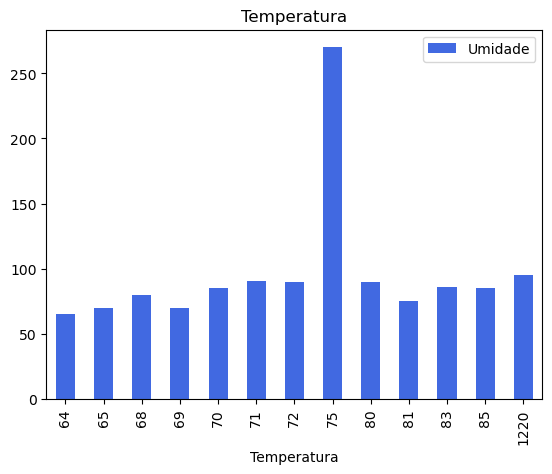

In [53]:
temperaturas.plot.bar(color="royalblue").set_title("Temperatura")

In [62]:
# Temperatura muito alta, devemos tratar isso...
# Considerando que o dado é numérico, devemos utilizar a mediana no lugar
df.loc[df["Temperatura"] >= 1000, "Temperatura"] = sta.median(df["Temperatura"])
# Testando
df.groupby(df["Temperatura"]).sum()

,Aparencia,Umidade,Vento,Jogar
Temperatura,,,,
64.0,menos,65.0,VERDADEIRO,sim
65.0,chuva,70.0,VERDADEIRO,nao
68.0,chuva,80.0,FALSO,sim
69.0,sol,70.0,FALSO,sim
70.0,chuva,85.5,FALSO,sim
71.0,chuva,91.0,VERDADEIRO,nao
72.0,nublado,90.0,VERDADEIRO,sim
73.5,73.5,73.5,73.5,73.5
75.0,chuvasol,270.0,FALSOVERDADEIRO,simsim


In [64]:
df.describe()

,Temperatura,Umidade
count,14.000000,14.000000
mean,73.678571,87.928571
std,6.556286,33.425495
min,64.000000,65.000000
25%,69.250000,70.875000
50%,72.750000,82.500000
75%,78.750000,89.000000
max,85.000000,200.000000


In [66]:
# Padronizar a coluna "Aparencia"
df["Aparencia"]

0         sol
1         sol
2     nublado
3       chuva
4       chuva
5       chuva
6       menos
7        73.5
8         sol
9       chuva
10        sol
11    nublado
12    nublado
13      chuva
Name: Aparencia, dtype: object

In [76]:
df.groupby(df["Aparencia"]).size()

Aparencia
73.5       1
chuva      5
menos      1
nublado    3
sol        4
dtype: int64

In [80]:
# Alterando todos os valores que não são "sol", "chuva" ou "nublado" da coluna "Aparencia" para a moda
df.loc[~df["Aparencia"].isin(("sol", "chuva", "nublado")), "Aparencia"] = sta.mode(df["Aparencia"])

,Aparencia,Umidade,Vento,Jogar
Temperatura,,,,
64.0,chuva,65.0,VERDADEIRO,sim
65.0,chuva,70.0,VERDADEIRO,nao
68.0,chuva,80.0,FALSO,sim
69.0,sol,70.0,FALSO,sim
70.0,chuva,85.5,FALSO,sim
71.0,chuva,91.0,VERDADEIRO,nao
72.0,nublado,90.0,VERDADEIRO,sim
73.5,chuva,73.5,73.5,73.5
75.0,chuvasol,270.0,FALSOVERDADEIRO,simsim


In [88]:
# Fazer o mesmo com a coluna Jogar e Vento
df.loc[~df["Jogar"].isin(("sim", "nao")), "Jogar"] = sta.mode(df["Jogar"])
df.loc[~df["Vento"].isin(("VERDADEIRO", "FALSO")), "Vento"] = sta.mode(df["Vento"])

In [90]:
# Testando
df.groupby("Jogar").count()

,Aparencia,Temperatura,Umidade,Vento
Jogar,,,,
nao,4,4,4,4
sim,10,10,10,10


In [92]:
df.groupby("Vento").count()

,Aparencia,Temperatura,Umidade,Jogar
Vento,,,,
FALSO,8,8,8,8
VERDADEIRO,6,6,6,6


In [94]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [96]:
# Verificando se temos alguma umidade menor que 0
df["Umidade"] < 0

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: Umidade, dtype: bool